# Introduction to SQL
    
In Week 1 you cleaned the data obtained from `lacity.org` that recorded details on traffic accidents.  You prepped this data to load it into a SQL database. But what we will see as we continue to analyze the data, is that there is more cleaning that needs to happen.
    
## Deliverables:
- Submit two files that has the name <span style='color:red'><b> YourLastName_Assingment_2: </span></b>
    1. Your **HTML** file that has your Source code and output
    2. Your **ipynb script** that has your Source code and output
    
## Objectives:
In this exercise you will use data cleaned from Week 1 of our class:
- Load data from csv file into a DataFrame Object
- Analyze the data using SQL and Python
- Use sqlalchemy to load data stored in a DataFrame object into SQLite database engine
- Use sqlalchemy to connect to SQLite database engine to execute SQL queries
- Execute different SQL queries


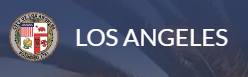

https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

### Structured Query Language (SQL) versus Python

The discussion board this week has you comparing the use of SQL to a general purpose language like Python.  What you will be able to test out this week in the homework is the mixing/matching of using SQL and Python to analyze data.

In [1]:
# load libraries
import pandas as pd
import numpy as np
# https://docs.sqlalchemy.org/en/13/intro.html
import sqlalchemy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# ------------------------------------------------------
# read in file from Week 1
# ------------------------------------------------------
df = pd.read_csv("Final Traffic.csv")

# check out fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549547 entries, 0 to 549546
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           549547 non-null  int64  
 1   Date                549547 non-null  object 
 2   Division            549547 non-null  object 
 3   Reporting_District  549547 non-null  int64  
 4   Age                 549547 non-null  int64  
 5   Gender              549547 non-null  object 
 6   Descent             549547 non-null  object 
 7   Year                549547 non-null  int64  
 8   Month               549547 non-null  int64  
 9   Day                 549547 non-null  int64  
 10  Hour                549547 non-null  int64  
 11  imputeAge           549547 non-null  bool   
 12  Latitude            549547 non-null  float64
 13  Longitude           549547 non-null  float64
dtypes: bool(1), float64(2), int64(7), object(4)
memory usage: 55.0+ MB


### Load traffic data into a table in a SQLite database

- we are creating a database called `LAtraffic`
- we are creating a table called `traffic`


In [3]:
# 'engine' will be used to reference the database
engine = create_engine('sqlite:///LAtraffic.db')

df.to_sql('traffic', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('traffic', engine).columns

549547

Index(['DR_Number', 'Date', 'Division', 'Reporting_District', 'Age', 'Gender',
       'Descent', 'Year', 'Month', 'Day', 'Hour', 'imputeAge', 'Latitude',
       'Longitude'],
      dtype='object')

### Next read in the MO file we created earlier in the class and add to the database

- we are creating a table in the `LAtraffic` database called `MO_accident`

In [4]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo = pd.read_csv("MO per accident.csv",dtype = {'MO_Codes':'str'})

mo.to_sql('MO_accident', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('MO_accident', engine).columns

3033153

Index(['DR_Number', 'MO_Codes'], dtype='object')

### Now read in a file that contains all MO codes and a description of what they mean

- we are creating a table in the `LAtraffic` database called `MO_master`

In [5]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo_mast = pd.read_csv("MO master.csv", dtype = {'Codes':'str'})

mo_mast.to_sql('MO_master', engine, if_exists = 'replace', index = False)
# check out the columns
pd.read_sql_table('MO_master', engine).columns

777

Index(['Codes', 'Description'], dtype='object')

### You can see the three tables that are now saved into the `LAtraffic` database

In [6]:
from sqlalchemy import schema
xMetaData = schema.MetaData(bind = engine)
xMetaData.reflect()
# will show table names
xMetaData.tables.keys()

dict_keys(['MO_accident', 'MO_master', 'traffic'])

<div class="alert alert-block alert-warning">
    
## Requirements:
Answer the homework questions below.  Add cells as needed. Make sure all cells are run before you save to HTML.
</div>

<div class="alert alert-block alert-warning"> 
    <b> Requirement 1 : (5 points) </b> Using <b>SQL query only</b>, produce output similar to value_counts output that shows Division and the count for each division with the highest count shown first (see output for q10). 
    
   


</div>

In [7]:
query = '''select division, count(*) as count
           from traffic
           group by division
           order by count desc'''
pd.read_sql_query(query, engine)

,Division,count
0,77th Street,37162
1,Southwest,32953
2,Wilshire,30340
3,N Hollywood,29169
4,Newton,28290
5,Olympic,28268
6,West LA,27761
7,Pacific,27653
8,Van Nuys,27646
9,Devonshire,27067


<div class="alert alert-block alert-warning"> 
<b> Requirement 2 : (5 points) </b>  Show the minimum, maximum and mean values for the Age column.  Do this only using <b>SQL</b>.
    
   


</div>

In [8]:
query = '''select min(age) as min_age, max(age) as max_age, avg(age) as mean_age from traffic
           '''
pd.read_sql_query(query, engine)

,min_age,max_age,mean_age
0,16,98,40.396983


<div class="alert alert-block alert-warning"> 
<b> Requirement 3 : (5 points) </b>  Find all Divisions with the word 'west' within the division title. Show the number of accidents in these Divisions.  Do this only using <b>SQL</b>. Sort with highest accident count showing on top.
    
   


</div>

In [9]:
query = '''select division, count(dr_number) as count from traffic
           where division like '%west%'
           group by division
           order by count desc
'''
pd.read_sql_query(query, engine)


,Division,count
0,Southwest,32953
1,West LA,27761
2,West Valley,26794


<div class="alert alert-block alert-warning"> 
<b> Requirement 4: (10 points) </b> Let's analyze the accidents for teenagers, 16 to 19, and for the older group over 80.

1. Use SQL to select those in the age ranges described.
2. Based on percentage, how does the younger group differ from the older group by Gender? (Answer with Python)
3. Based on percentage, how does the younger group differ from the older group by Descent? (Answer with Python)
    
   


</div>

In [10]:
query = '''select * from traffic
           where age between 16 and 19
           or age > 80
'''
age_data = pd.read_sql_query(query, engine)

In [11]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11545 entries, 0 to 11544
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DR_Number           11545 non-null  int64  
 1   Date                11545 non-null  object 
 2   Division            11545 non-null  object 
 3   Reporting_District  11545 non-null  int64  
 4   Age                 11545 non-null  int64  
 5   Gender              11545 non-null  object 
 6   Descent             11545 non-null  object 
 7   Year                11545 non-null  int64  
 8   Month               11545 non-null  int64  
 9   Day                 11545 non-null  int64  
 10  Hour                11545 non-null  int64  
 11  imputeAge           11545 non-null  int64  
 12  Latitude            11545 non-null  float64
 13  Longitude           11545 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 1.2+ MB


In [12]:
#Based on percentage, how does the younger group differ from the older group by Gender?

young = age_data[age_data["Age"] < 80]
old = age_data[age_data["Age"] > 80]

#young
young_male_perc = round(len(young[young["Gender"] == 'Male']) / len(young) *100,0)
young_female_perc = round(len(young[young["Gender"] == 'Female']) / len(young) *100,0)
young_other_perc = round(len(young[young["Gender"] == 'Other']) / len(young) *100,0)

#old
old_male_perc = round(len(old[old["Gender"] == 'Male']) / len(old) *100,0)
old_female_perc = round(len(old[old["Gender"] == 'Female']) / len(old) *100,0)
old_other_perc = round(len(old[old["Gender"] == 'Other']) / len(old) *100,0)

gender_age_data = pd.DataFrame({'Male': [young_male_perc, old_male_perc],
                    'Female': [young_female_perc, old_female_perc],
                    'Other': [young_other_perc, old_other_perc]})

gender_age_data.index = ['Young', 'Old']

gender_age_data

,Male,Female,Other
Young,41.0,19.0,40.0
Old,58.0,41.0,0.0


In [13]:
#Based on percentage, how does the younger group differ from the older group by Descent?


#young
young_unknown_perc = round(len(young[young["Descent"] == 'Unknown']) / len(young) *100,0)
young_white_perc = round(len(young[young["Descent"] == 'White']) / len(young) *100,0)
young_other_perc = round(len(young[young["Descent"] == 'Other']) / len(young) *100,0)
young_black_perc = round(len(young[young["Descent"] == 'Black']) / len(young) *100,0)
young_hispanic_perc = round(len(young[young["Descent"] == 'Hispanic']) / len(young) *100,0)
young_asian_perc = round(len(young[young["Descent"] == 'Asian']) / len(young) *100,0)

#old
old_unknown_perc = round(len(old[old["Descent"] == 'Unknown']) / len(old) *100,0)
old_white_perc = round(len(old[old["Descent"] == 'White']) / len(old) *100,0)
old_other_perc = round(len(old[old["Descent"] == 'Other']) / len(old) *100,0)
old_black_perc = round(len(old[old["Descent"] == 'Black']) / len(old) *100,0)
old_hispanic_perc = round(len(old[old["Descent"] == 'Hispanic']) / len(old) *100,0)
old_asian_perc = round(len(old[old["Descent"] == 'Asian']) / len(old) *100,0)

descent_age_data = pd.DataFrame(
                   {'Unknown': [young_unknown_perc, old_unknown_perc],
                    'White': [young_white_perc, old_white_perc],
                    'Other': [young_other_perc, old_other_perc],
                    'Black': [young_black_perc, old_black_perc],
                    'Hispanic': [young_hispanic_perc, old_hispanic_perc],
                    'Asian': [young_asian_perc, old_asian_perc],})

descent_age_data.index = ['Young', 'Old']

descent_age_data


,Unknown,White,Other,Black,Hispanic,Asian
Young,44.0,9.0,14.0,6.0,25.0,1.0
Old,2.0,48.0,12.0,14.0,14.0,9.0


<div class="alert alert-block alert-warning"> 
<b> Requirement 5 : (5 points) </b> Let's do an analysis on Hit and Run accidents. We saw that there are two MO codes that represent Hit and Run - 3029 and 3030. 
   
1. Use SQL to query all accidents with codes 3029 or 3030 along with the Division where the accident occurred.   
2. Compare the top 5 Divisions in Requirement 1 that included all accidents to the top 5 Divisions with Hit and Run accidents. How do these differ?
    
   


</div>

In [15]:
query = '''select t.division, count(*) as count from traffic as t
           join mo_accident as a
           on t.dr_number = a.dr_number
           where mo_codes = 3029
           or mo_codes = 3030
           group by t.division
           order by t.division desc
           limit 5
'''
pd.read_sql_query(query, engine)

print("There is only one division, Wilshire, that is in both the top 5 overall and the top 5 Hit and Run groups")


,Division,count
0,Wilshire,12116
1,West Valley,10076
2,West LA,10235
3,Van Nuys,11480
4,Topanga,8779


There is only one division, Wilshire, that is in both the top 5 overall and the top 5 Hit and Run groups


<div class="alert alert-block alert-warning"> 
<b> Requirement 6 : (5 points) </b>  Use SQL to only select valid latititude and longitudes.  Once you have the data, use matplotlib to plot latitude, longitude and use the Division for hue.
    
- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
    
   


</div>

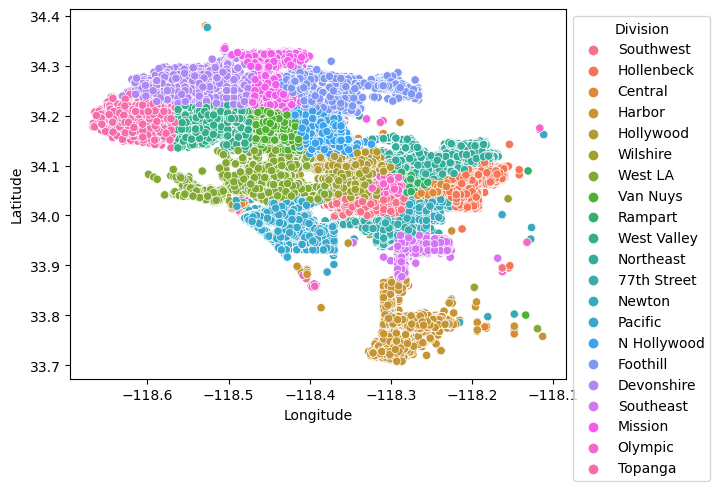

In [16]:
query = '''select * from traffic
           where latitude between 33.6 and 34.4
           and longitude between -118.7 and -118.1
'''
data = pd.read_sql_query(query, engine)

plot = sns.scatterplot(data = data, x = data["Longitude"], y = data["Latitude"], hue = data["Division"])
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

<div class="alert alert-block alert-warning"> 
<b> Requirement 7: (5 points) </b>  Are the imputed records the same as the non-imputed records?  Select imputeAge, Gender and Descent.

- Compare Gender for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Gender?
- Compare Descent for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Descent?
    
   


</div>

In [313]:
query = '''select imputeage, gender, count(gender) as count from traffic
           group by imputeage, gender
'''
impute_gender_data = pd.read_sql_query(query, engine)
print(impute_gender_data, "\n\nThere are many more non imputed records overall, but proportionally there are more Female and Other imputed records \nthan Male. I would not consider them to be similar for this reason\n")

query = '''select imputeage, descent, count(descent) as count from traffic
           group by imputeage, descent
'''
impute_descent_data = pd.read_sql_query(query, engine)
print(impute_descent_data, "\n\nThere are many more non imputed records overall, but proportionally there are more Unknown and Other imputed records, and fewer Asian imputed records. I would not consider them to be similar for this reason")


   imputeAge  Gender   count
0          0  Female  192889
1          0    Male  276568
2          0   Other    3594
3          1  Female   16992
4          1    Male   47928
5          1   Other   11576 

There are many more non imputed records overall, but proportionally there are more Female and Other imputed records 
than Male. I would not consider them to be similar for this reason

    imputeAge   Descent   count
0           0     Asian   26920
1           0     Black   70380
2           0  Hispanic  188439
3           0     Other   59910
4           0   Unknown   11554
5           0     White  115848
6           1     Asian    1236
7           1     Black    4338
8           1  Hispanic   21445
9           1     Other   18797
10          1   Unknown   16893
11          1     White   13787 

There are many more non imputed records overall, but proportionally there are more Unknown and Other imputed records, and fewer Asian imputed records. I would not consider them to be similar f

<div class="alert alert-block alert-warning"> 
<b> Requirement 8: (15 points) </b>  Have hit and run accidents increased or decreased over time?  Is the change over time the same in all Districts?

1. Select only non-imputed rows for both types of Hit and Run accidents that occurred 2010-2020.
2. Show the count of accidents for each District for every year.  How you show the data is up to you.
3. In a Markdown cell, explain if the data is showing you that Hit and Run accidents are mosting increasing or decreasing in different districts?  Which districts saw increases in 2020 over previous year?
4. In a Markdown cell, explain what you see with 2010 and 2011 and suggest what can be done with these years?
   
</div>

In [327]:
query = '''select reporting_district, year, count(t.dr_number) as count from traffic as t
           join mo_accident as a
           on t.dr_number = a.dr_number
           where mo_codes = 3029
           or mo_codes = 3030
           and year between 2010 and 2020
           and imputeage = 0
           group by reporting_district, year
'''

q8_data = pd.read_sql_query(query, engine)

q8_data.to_csv("q8_data.csv")


In [326]:
query = '''select year, count(t.dr_number) as count from traffic as t
           join mo_accident as a
           on t.dr_number = a.dr_number
           where mo_codes = 3029
           or mo_codes = 3030
           and year between 2010 and 2020
           and imputeage = 0
           group by year
'''

pd.read_sql_query(query, engine)

,Year,count
0,2010,20
1,2011,72
2,2012,14883
3,2013,17682
4,2014,18557
5,2015,21300
6,2016,24036
7,2017,24794
8,2018,24749
9,2019,24753


Overall, hit and runs are increasing as you can see in the query above and also via reporting_district level analysis in the csv. In years 2010 and 2011, there are so few records that I would remove these two years. Perhaps there was a data migration and most hit and run data is stored in a legacy system, or there was some other issue with data transfer. There was an overall dropoff in the year 2020, likely due to COVID-19 lockdowns.

In [347]:
# reporting_district = q8_data["Reporting_District"].unique()

# for reporting_district in q8_data:
#     if q8_data["Reporting_District"] == reporting_district:
#         print("test")



False

<div class="alert alert-block alert-warning"> 
<b> Requirement 9: (5 points) </b>  We haven't looked yet at Ages of drivers across the years.  Are these complete enough to do an Age analysis?
   
1. Select for all accidents types.
2. Show Age counts for each year.
    

</div>

In [45]:
query = '''select year, age, count(*) as count from traffic
           group by year, age
'''

q9_data = pd.read_sql_query(query, engine)

pivot = q9_data.pivot_table(index = q9_data['Age'], columns = q9_data['Year'], fill_value = 0)

pivot.head(40)

count                                                                    
Year  2010  2011  2012  2013  2014  2015   2016   2017  2018  2019  2020  2021
Age                                                                           
16       1     0     0     0     0     0      0     15     3    99    68    35
17       0     0     0     0     0     1      0      2   110   135   127    53
18       1     0     0     0     0     1      0      7    11  2467   314   102
19       1     0     1     0     0     3      1      6    16   538  3093   176
20     887   940   951   859   868   950   1013    973   806   838   670   825
21     938  1017  1060   943   952  1073   1028   1002   915   924   711   311
22    1021  1011  1114  1092  1066  1196   1235   1207  1144  1110   802   298
23    1045  1048  1094  1102  1228  1260   1337   1235  1214  1160   868   257
24    1058  1027  1090  1033  1229  1351   1345   1387  1393  1208   923   317
25    1246  1304  1172  1249  1232  1470   1598   1579  1521  1391  1053   393
26    1008  1045  1026   984  1094  1198   1411   1430  1369  1354   971   312
27     977  1031  1031  1064  1108  1252   1373   1456  1448  1421  1072   337
28    1036  1025  1021  1006  1077  1191   1360   1389  1483  1479  1050   349
29     949   981   966   936   993  1108   1289   1336  1356  1429  1053   348
30    1246  1301  1350  1249  1404  1547   1723   1684  1638  1608  1273   540
31     862   937   941   893   982  1071   1228   1261  1221  1256   932   324
32     831   895   924   921   926  1052   1161   1197  1207  1279   935   313
33     863   814   756   811   891   995   1124   1158  1204  1205   812   289
34     792   831   762   815   832   947   1113   1175  1098  1109   859   282
35    1129  1085  1039  1061  1099  1229   1293   1329  1313  1256  1040   434
36     716   805   775   723   793   858   1030   1097  1105  1140   768   303
37     751   726   766   783   766   820   1005    992  1075  1042   749   257
38     815   771   794   740   760   805    892    961  1042  1050   724   261
39     781   802   703   669   690   782    920    936  1005   984   750   252
40    8351  7729  7807  8093  8190  9094  10278  10188  9010  5692  3582  1842
41     735   822   779   669   707   761    911    953   903   894   673   248
42     791   769   806   757   751   700    827    872   865   899   659   225
43     752   743   720   766   741   771    763    812   867   866   605   203
44     725   714   686   741   758   786    816    791   812   811   614   216
45     962  1014   964   859   928   973    965    975   930   911   694   317
46     725   739   729   686   665   836    794    886   787   785   589   225
47     688   690   730   658   653   711    880    900   854   762   568   188
48     692   662   693   656   720   773    751    823   811   836   547   218
49     667   654   718   685   708   804    831    784   884   901   557   196
50    1030  1122  1026  1036  1000  1199   1209   1261  1224  1162   916   476
51     641   627   634   610   665   698    771    783   801   770   535   231
52     620   610   618   615   626   666    767    823   729   790   550   205
53     644   606   609   573   655   659    725    712   747   701   544   191
54     549   570   553   589   610   707    724    716   763   745   518   183
55     660   684   646   668   661   745    788    748   783   737   589   206

These are complete enough to do an age analysis, but there are some potential discrepancies. It seems like the ages are not self reported, or if they are the individuals give approximations for their age. For example, the age 40 has 89k records but 39 and 41 are both fractions of that number. Maybe 40 year olds really do get into that many more accidents than others who are a similar age, or the data is inaccurate.

<div class="alert alert-block alert-warning"> 
<b> Requirement 10: (15 points) </b>  Your choice of what question to ask of this data. What are you still curious about? To get full credit for this question, it needs to be orginal and unlike any question asked in the notebook already. Consider alternative ways to look at this data that has not already been explored.
    
1. Clearly state your question in a Markdown cell.
2. Show the code for your answer.
3. Clearly state your interpretation of the findings in another markdown cell.
   
</div>

I would like to analyze time of the day to understand if there are any time periods within a day where accidents occur more often

question: Using SQL only, group accident count by hour to understand if crashes are uniformly distributed throughout the day, or if certain times over or under index in crash counts

In [49]:
query = '''select hour, count(*) as count from traffic
           group by hour
           order by count desc
'''

pd.read_sql_query(query, engine)


,Hour,count
0,17,38003
1,18,35638
2,15,35494
3,16,34903
4,14,33011
5,13,30453
6,12,29990
7,19,29737
8,8,26127
9,11,25762


Based on the output above, there is not a uniform distribution throughout the day. The most crashes occur between 1:00 PM and 6:00 PM. This is interesting, my original hypothesis was that peaks would occur around morning and evening rush hours. While the highest volume tapers off around evening rush hour, it begins well before rush hour starts. There are no hours around the morning that are in the top 5. I figured that more crashes would happen during the morning rush!